In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
from pprint import pprint

In [52]:
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv("/content/drive/MyDrive/Eli Lilly/data/dataset/train.csv")

In [53]:
df = pd.read_csv("D:/Sashank/Music Data/train.csv")

In [54]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15681 entries, 0 to 15680
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instance_id        15681 non-null  object 
 1   track_name         15681 non-null  object 
 2   popularity         15039 non-null  float64
 3   acousticness       15681 non-null  float64
 4   danceability       15125 non-null  float64
 5   duration_ms        15587 non-null  float64
 6   energy             15587 non-null  float64
 7   instrumentalness   15586 non-null  float64
 8   key                15681 non-null  object 
 9   liveness           15681 non-null  float64
 10  loudness           15645 non-null  float64
 11  voice_gender       14916 non-null  object 
 12  mode               15646 non-null  object 
 13  speechiness        15655 non-null  float64
 14  tempo              15681 non-null  object 
 15  musician_category  14321 non-null  object 
 16  valence            150

In [55]:
#Dropping NaN Rows from data set 
df1 = df.copy(deep=True)

In [56]:
df.isna().any()

instance_id          False
track_name           False
popularity            True
acousticness         False
danceability          True
duration_ms           True
energy                True
instrumentalness      True
key                  False
liveness             False
loudness              True
voice_gender          True
mode                  True
speechiness           True
tempo                False
musician_category     True
valence               True
music_genre          False
dtype: bool

In [57]:
df1.dropna(axis=0,how="any",inplace=True)


In [58]:
df1.isna().any()

instance_id          False
track_name           False
popularity           False
acousticness         False
danceability         False
duration_ms          False
energy               False
instrumentalness     False
key                  False
liveness             False
loudness             False
voice_gender         False
mode                 False
speechiness          False
tempo                False
musician_category    False
valence              False
music_genre          False
dtype: bool

In [59]:
print(df.shape,df1.shape)

(15681, 18) (11756, 18)


In [60]:
df1.replace("?",np.nan, inplace=True)

In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11756 entries, 1 to 15680
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instance_id        11756 non-null  object 
 1   track_name         11756 non-null  object 
 2   popularity         11756 non-null  float64
 3   acousticness       11756 non-null  float64
 4   danceability       11756 non-null  float64
 5   duration_ms        11756 non-null  float64
 6   energy             11756 non-null  float64
 7   instrumentalness   11756 non-null  float64
 8   key                11756 non-null  object 
 9   liveness           11756 non-null  float64
 10  loudness           11756 non-null  float64
 11  voice_gender       11756 non-null  object 
 12  mode               10938 non-null  object 
 13  speechiness        11756 non-null  float64
 14  tempo              10653 non-null  object 
 15  musician_category  11756 non-null  object 
 16  valence            117

In [62]:
df1.dropna(axis=0,how="any",inplace=True)


In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9919 entries, 2 to 15680
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instance_id        9919 non-null   object 
 1   track_name         9919 non-null   object 
 2   popularity         9919 non-null   float64
 3   acousticness       9919 non-null   float64
 4   danceability       9919 non-null   float64
 5   duration_ms        9919 non-null   float64
 6   energy             9919 non-null   float64
 7   instrumentalness   9919 non-null   float64
 8   key                9919 non-null   object 
 9   liveness           9919 non-null   float64
 10  loudness           9919 non-null   float64
 11  voice_gender       9919 non-null   object 
 12  mode               9919 non-null   object 
 13  speechiness        9919 non-null   float64
 14  tempo              9919 non-null   object 
 15  musician_category  9919 non-null   object 
 16  valence            9919

In [64]:
s = df1["tempo"] 
s = pd.to_numeric(s)

In [65]:
df1["tempo"] = s

In [66]:
df1 = df1.drop(columns=['instance_id','track_name'])

In [67]:
from sklearn.compose import make_column_selector as selector
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

In [68]:
X = df1.iloc[ : , :-1]
X.shape
Y = df1["music_genre"]

In [69]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
target= lb.fit_transform(Y)
Y = pd.DataFrame(target)

In [70]:
y = Y.squeeze()

In [71]:
numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

In [72]:
categorical_columns = list(categorical_columns)
categorical_columns

['key', 'voice_gender', 'mode', 'musician_category']

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

preprocessing = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), categorical_columns),
        ("Scale", MinMaxScaler(), numerical_columns)]
)
x = preprocessing.fit_transform(X)
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.018311,0.902400,0.080142,0.887279,0.000000,0.022379,0.882529,0.098362,0.382038,0.590104
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.784686,0.215721,0.120262,0.532503,0.002553,0.109658,0.450206,0.015648,0.420772,0.069094
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000417,0.903174,0.059567,0.000000,0.000356,0.057374,0.837753,0.028831,0.381709,0.449637
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.082993,0.315132,0.080780,0.818889,0.000000,0.067399,0.863266,0.047696,0.769256,0.515491
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.927117,0.606771,0.060785,0.500645,0.135681,0.087138,0.444469,0.043086,0.447650,0.548416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.963249,0.071337,0.055240,0.497832,0.949496,0.110721,0.404582,0.034693,0.209851,0.037778
9915,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.792196,0.322454,0.000000,0.571707,0.026631,0.216570,0.659023,0.021906,0.482036,0.579883
9916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.807131,0.394829,0.110876,0.644538,0.000481,0.624106,0.486386,0.434696,0.514088,0.565495
9917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.103623,0.579299,0.044343,0.913452,0.000082,0.139350,0.837931,0.037324,0.441822,0.373919


In [74]:
categorical_columns

['key', 'voice_gender', 'mode', 'musician_category']

In [75]:
from sklearn.compose import make_column_transformer, make_column_selector

ohn = OneHotEncoder()
scale = MinMaxScaler()

ohn_ct = make_column_transformer(
    (ohn, categorical_columns),
    remainder = 'passthrough' 
)

df_ohn = ohn_ct.fit_transform(X)
df_ohn = pd.DataFrame(df_ohn)


In [76]:
test = list(ohn_ct.get_feature_names_out())[:-11]

In [77]:
test1 = list(ohn_ct.get_feature_names_out())[-11:]


In [78]:
new_list = [s.replace("onehotencoder__", " ") for s in list(ohn_ct.get_feature_names_out())[:-11]]
pprint(new_list)


[' key_Scale A',
 ' key_Scale A Sharp',
 ' key_Scale B',
 ' key_Scale C',
 ' key_Scale C Sharp',
 ' key_Scale D',
 ' key_Scale D Sharp',
 ' key_Scale E',
 ' key_Scale F',
 ' key_Scale F Sharp',
 ' key_Scale G',
 ' key_Scale G Sharp',
 ' voice_gender_Both',
 ' voice_gender_Female',
 ' voice_gender_Male',
 ' mode_Major',
 ' mode_Minor',
 ' musician_category_Band',
 ' musician_category_Duet',
 ' musician_category_Solo']


In [79]:
new_list1 = [s.replace("remainder__", " ") for s in list(ohn_ct.get_feature_names_out())[-11:]]
pprint(new_list1)

[' popularity',
 ' acousticness',
 ' danceability',
 ' duration_ms',
 ' energy',
 ' instrumentalness',
 ' liveness',
 ' loudness',
 ' speechiness',
 ' tempo',
 ' valence']


In [80]:
cols  = new_list +new_list1
len(cols)

31

In [81]:
df_ohn.columns = cols

In [82]:
df_ohn

,key_Scale A,key_Scale A Sharp,key_Scale B,key_Scale C,key_Scale C Sharp,key_Scale D,key_Scale D Sharp,key_Scale E,key_Scale F,key_Scale F Sharp,...,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.020041,0.967948,273314.723,0.857411,0.000000,0.042030,-4.995,0.119917,105.018,0.635525
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.858769,0.280645,410136.987,0.114732,0.002753,0.134782,-26.922,0.039139,112.183,0.074412
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000459,0.968723,203145.857,-1.000000,0.000384,0.079220,-7.266,0.052014,104.957,0.484246
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.090830,0.380147,275490.630,0.714246,0.000000,0.089873,-5.972,0.070437,176.647,0.555169
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.014646,0.672051,207299.190,0.048039,0.146346,0.110850,-27.213,0.065935,117.155,0.590628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.054190,0.136130,188388.500,0.042151,1.024128,0.135912,-29.236,0.057739,73.166,0.040686
9915,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.866988,0.387476,-1.000,0.196799,0.028725,0.248399,-16.331,0.045251,123.516,0.624518
9916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.883333,0.459917,378128.464,0.349263,0.000519,0.681492,-25.087,0.448377,129.445,0.609022
9917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.113408,0.644554,151226.592,0.912201,0.000089,0.166336,-7.257,0.060308,116.077,0.402700


In [83]:
df_ohn.columns[-11:]


Index([' popularity', ' acousticness', ' danceability', ' duration_ms',
       ' energy', ' instrumentalness', ' liveness', ' loudness',
       ' speechiness', ' tempo', ' valence'],
      dtype='object')

In [84]:
ohn_num = make_column_transformer(
    (scale, new_list1) ,
    remainder = 'passthrough' 
)

num = ohn_num.fit_transform(df_ohn)
df_final = pd.DataFrame(num)


In [85]:
df_final.columns = cols

In [86]:
df_final.columns

Index([' key_Scale A', ' key_Scale A Sharp', ' key_Scale B', ' key_Scale C',
       ' key_Scale C Sharp', ' key_Scale D', ' key_Scale D Sharp',
       ' key_Scale E', ' key_Scale F', ' key_Scale F Sharp', ' key_Scale G',
       ' key_Scale G Sharp', ' voice_gender_Both', ' voice_gender_Female',
       ' voice_gender_Male', ' mode_Major', ' mode_Minor',
       ' musician_category_Band', ' musician_category_Duet',
       ' musician_category_Solo', ' popularity', ' acousticness',
       ' danceability', ' duration_ms', ' energy', ' instrumentalness',
       ' liveness', ' loudness', ' speechiness', ' tempo', ' valence'],
      dtype='object')

In [87]:
from sklearn.model_selection import  train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df_final,y,test_size=0.2)

In [88]:
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

k_range = list(range(1,15))
scores = []
error = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy_score(Y_test, y_pred)
    scores.append(metrics.accuracy_score(Y_test,y_pred))
    error.append(np.mean(y_pred != Y_test))

scores= np.mean(scores)
print(scores)

0.5791690668202766


In [89]:
from sklearn.model_selection import cross_val_score

k_range = list(range(1, 15))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

In [90]:
print(k_scores)

[0.5654640255891443, 0.5266492705378611, 0.5601743530450637, 0.5809672798193259, 0.5954601186070816, 0.5983589087132053, 0.5965936198665274, 0.6001211799721112, 0.6008774827600446, 0.5973511932177332, 0.5954607538887178, 0.5928157587962684, 0.5877738460903179, 0.5861357723912953]


Text(0, 0.5, 'Cross-Validated Accuracy')

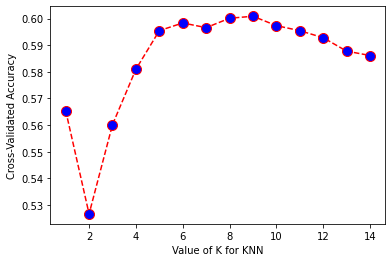

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Text(0, 0.5, 'Mean Error')

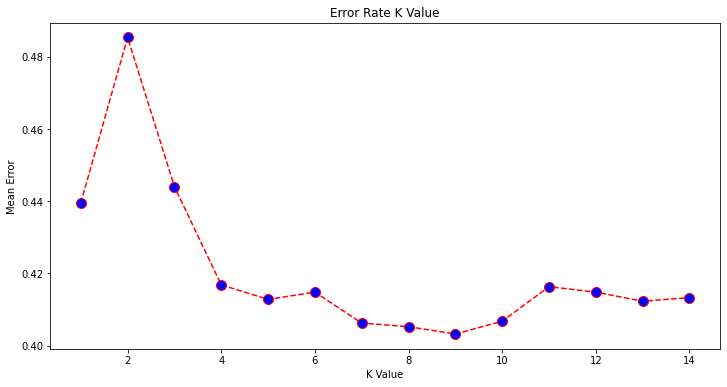

In [92]:
plt.figure(figsize=(12, 6))
plt.plot(k_range, error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [93]:
# Best Value of K
knn = KNeighborsClassifier(n_neighbors=7)
knn_base = knn.fit(X_train,Y_train)
y_pred_knn_base = knn.predict(X_test)
print(accuracy_score(Y_test, y_pred_knn_base))
#print(cross_val_score(knn,X_test,Y_test, cv=10, scoring="accuracy").mean())


0.59375


## GridSearch


In [94]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 15))
weight_options = ['uniform', 'distance']
algorithms = [ 'ball_tree', 'kd_tree', 'brute']

In [95]:
param_grid = dict(n_neighbors=k_range, weights = weight_options, algorithm = algorithms)
pprint(param_grid)


{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'weights': ['uniform', 'distance']}


In [96]:
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='macro')

In [97]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy',n_jobs = -1)
grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=7), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [98]:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]


,mean_test_score,std_test_score,params
0,0.565464,0.015307,"{'algorithm': 'ball_tree', 'n_neighbors': 1, '..."
1,0.565464,0.015307,"{'algorithm': 'ball_tree', 'n_neighbors': 1, '..."
2,0.526649,0.012916,"{'algorithm': 'ball_tree', 'n_neighbors': 2, '..."
3,0.565464,0.015307,"{'algorithm': 'ball_tree', 'n_neighbors': 2, '..."
4,0.560174,0.011571,"{'algorithm': 'ball_tree', 'n_neighbors': 3, '..."
...,...,...,...
79,0.603904,0.013437,"{'algorithm': 'brute', 'n_neighbors': 12, 'wei..."
80,0.587774,0.015050,"{'algorithm': 'brute', 'n_neighbors': 13, 'wei..."
81,0.602895,0.011387,"{'algorithm': 'brute', 'n_neighbors': 13, 'wei..."
82,0.586136,0.012379,"{'algorithm': 'brute', 'n_neighbors': 14, 'wei..."


In [99]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6104546710670509
{'algorithm': 'ball_tree', 'n_neighbors': 8, 'weights': 'distance'}
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8, weights='distance')


## Using the best parameters to make predictions


In [100]:
y_pred_grid_knn = grid.predict(X_test)
accuracy_score(Y_test, y_pred_grid_knn)

0.6073588709677419

In [101]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_grid_knn))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       496
           1       0.16      0.06      0.09        86
           2       0.25      0.04      0.07        70
           3       0.33      0.04      0.06        57
           4       0.58      0.46      0.51       363
           5       0.56      0.63      0.59       419
           6       0.52      0.70      0.60       493

    accuracy                           0.61      1984
   macro avg       0.46      0.40      0.39      1984
weighted avg       0.58      0.61      0.58      1984



In [102]:
print(metrics.f1_score(Y_test,y_pred_grid_knn,average="weighted"))
f1_score_knn = metrics.f1_score(Y_test,y_pred_grid_knn,average="weighted")

0.583423639200396


In [103]:
print(metrics.roc_auc_score(Y_test,y_score = grid.predict_proba(X_test), multi_class='ovr'))
roc_auc_score_knn = metrics.roc_auc_score(Y_test,y_score = grid.predict_proba(X_test), multi_class='ovr')

0.7687676317527811


# Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegressionCV

logreg = LogisticRegressionCV(cv = 5, random_state = 0,solver='newton-cg',n_jobs = -1).fit(X_train,Y_train)


In [105]:
y_pred_log_test = logreg.predict(X_test)

In [106]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_log_test))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       496
           1       0.60      0.29      0.39        86
           2       0.48      0.33      0.39        70
           3       0.00      0.00      0.00        57
           4       0.66      0.71      0.68       363
           5       0.74      0.76      0.75       419
           6       0.74      0.85      0.79       493

    accuracy                           0.75      1984
   macro avg       0.58      0.55      0.56      1984
weighted avg       0.72      0.75      0.73      1984



C:\Users\sasha\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sasha\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sasha\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
from sklearn.metrics import f1_score
f1_score_log = metrics.f1_score(Y_test,y_pred_log_test,average='weighted')
print(f1_score_log)


0.7319904793296835


In [111]:
from sklearn.metrics import roc_auc_score
roc_auc_score_log = metrics.roc_auc_score(Y_test, y_score=logreg.predict_proba(X_test), multi_class='ovr')
pprint(roc_auc_score_log)

0.9302862756519353


In [112]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred_log_test)

0.6259327900933026

## Classification: Full Trees

In [113]:
from sklearn.tree import  DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

In [114]:
clf_pred = clf.predict(X_test)

In [115]:
clf_f1 = metrics.f1_score(Y_test,clf_pred,average="weighted")
clf_f1

0.666414149248323

In [116]:
roc_clf =  metrics.roc_auc_score(Y_test,y_score = clf.predict_proba(X_test), multi_class='ovr')
roc_clf

0.7367790914539267

## Hyperpapmeter optimization for Decision Tree Classifier

In [120]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 25, 1)
leaf_space      = pd.np.arange(1, 100, 1)

C:\Users\sasha\AppData\Local\Temp/ipykernel_12228/2080369068.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space     = pd.np.arange(1, 25, 1)
C:\Users\sasha\AppData\Local\Temp/ipykernel_12228/2080369068.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space      = pd.np.arange(1, 100, 1)


In [121]:
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


In [123]:
tuned_tree_cv = RandomizedSearchCV(estimator             = clf,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 300,
                                   scoring = "accuracy"
                                   )



In [124]:
tuned_tree_cv.fit(X_train, Y_train)


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=300,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'splitter': ['best', 'random']},
                   scoring='accuracy')

In [125]:
tuned_tree_cv.best_params_

{'splitter': 'best',
 'min_samples_leaf': 14,
 'max_depth': 9,
 'criterion': 'gini'}

In [126]:
y_best_dtc = tuned_tree_cv.predict(X_test)
f1_score_dtc = metrics.f1_score(Y_test,y_best_dtc,average="weighted")
print(f1_score_dtc)


0.7227086703864338


In [127]:
roc_auc_score_dtc = roc_auc_score(Y_test, y_score =tuned_tree_cv.predict_proba(X_test), multi_class='ovr')
print(roc_auc_score_dtc)


0.902081065988968


## Random Forest Classifier

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [129]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

In [130]:
rf_classifier.fit(X_train, Y_train)
y_pred_rf = rf_classifier.predict(X_test)


In [131]:
print(rf_classifier.score(X_test,Y_test))

0.7862903225806451


In [132]:
f1_score_rf = metrics.f1_score(Y_test,y_pred_rf,average="weighted")
print(f1_score_rf)

0.7670007061649378


In [133]:
roc_auc_score_rf = roc_auc_score(Y_test, y_score= rf_classifier.predict_proba(X_test), multi_class='ovr')
print(roc_auc_score_rf)


0.9338026399636961


In [134]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [135]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [136]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [137]:
rf_random = RandomizedSearchCV(estimator = rf_classifier, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

In [138]:
rf_rand = rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [139]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': True}

In [140]:
y_best_rf = rf_rand.predict(X_test)
print(metrics.f1_score(Y_test,y_best_rf,average="weighted"))
f1_score_best_rf = metrics.f1_score(Y_test,y_best_rf,average="weighted")

0.7708858015857614


In [141]:
roc_auc_score_rf_best = roc_auc_score(Y_test,y_score=rf_rand.predict_proba(X_test), multi_class='ovr')
print(roc_auc_score_rf_best)

0.9414041411691265


In [142]:
print(rf_classifier.feature_importances_)
print(f" There are {len(rf_classifier.feature_importances_)} features in total")

[0.181343   0.10366382 0.10322728 0.03869242 0.0816093  0.07417792
 0.03511574 0.09006397 0.1005666  0.04058656 0.06252121 0.00351058
 0.00348024 0.00370888 0.00360993 0.00449274 0.0038757  0.00210336
 0.0034475  0.00378809 0.00335555 0.00392789 0.00360113 0.00463596
 0.00547202 0.00541421 0.00698405 0.00722422 0.00565101 0.00467932
 0.0054698 ]
 There are 31 features in total


In [143]:
og = df1.iloc[:,:-1]


In [144]:
feature_importances = list(zip(cols, rf_classifier.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked]

Feature:  key_Scale A                        Importance: 0.18134299770924178
Feature:  key_Scale A Sharp                  Importance: 0.10366382088135076
Feature:  key_Scale B                        Importance: 0.10322727653263736
Feature:  key_Scale F                        Importance: 0.10056660229897683
Feature:  key_Scale E                        Importance: 0.09006396622503998
Feature:  key_Scale C Sharp                  Importance: 0.08160929760540375
Feature:  key_Scale D                        Importance: 0.07417792392492559
Feature:  key_Scale G                        Importance: 0.06252121127271544
Feature:  key_Scale F Sharp                  Importance: 0.04058656467877738
Feature:  key_Scale C                        Importance: 0.03869241770502655
Feature:  key_Scale D Sharp                  Importance: 0.03511573819326785
Feature:  loudness                           Importance: 0.0072242171915602605
Feature:  liveness                           Importance: 0.006984054820568

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

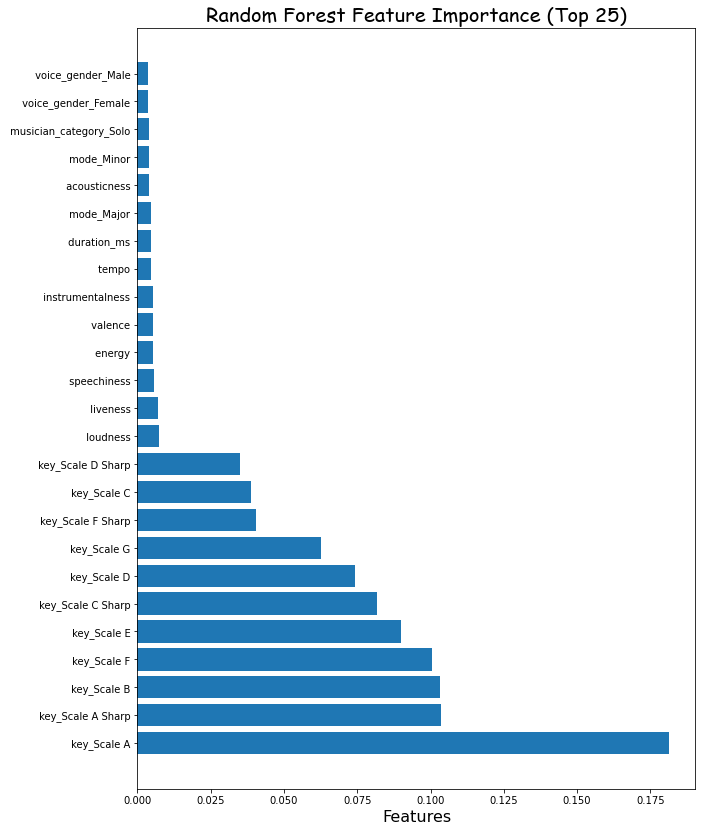

In [145]:
feature_names_25 = [i[0] for i in feature_importances_ranked[:25]]
y_ticks = np.arange(0, len(feature_names_25))
x_axis = [i[1] for i in feature_importances_ranked[:25]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_25, x_axis)   #horizontal barplot
plt.title('Random Forest Feature Importance (Top 25)',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()

## Gradient Boosting Classifier 

In [146]:
from sklearn.ensemble import GradientBoostingClassifier # gbm

gb = GradientBoostingClassifier()
gb = gb.fit(X_test,Y_test)

In [147]:
y_pred_gb = gb.predict(X_test)

In [148]:
f1_score_gb = metrics.f1_score(Y_test,y_pred_gb, average='weighted')
print(f1_score_gb)

0.9672897961397339


In [149]:
roc_auc_score_gb = roc_auc_score(Y_test,y_score=gb.predict_proba(X_test), multi_class='ovr')
print(roc_auc_score_gb)

0.9989578285676883


In [150]:
print(classification_report(Y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       496
           1       0.99      0.94      0.96        86
           2       1.00      0.94      0.97        70
           3       1.00      0.93      0.96        57
           4       0.98      0.96      0.97       363
           5       0.96      0.95      0.95       419
           6       0.94      0.97      0.95       493

    accuracy                           0.97      1984
   macro avg       0.98      0.96      0.97      1984
weighted avg       0.97      0.97      0.97      1984



In [151]:
feature_importances = list(zip(cols, gb.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked]

Feature:  key_Scale A                        Importance: 0.24732663082868075
Feature:  key_Scale F                        Importance: 0.16871192771278892
Feature:  key_Scale E                        Importance: 0.16286484908476054
Feature:  key_Scale A Sharp                  Importance: 0.14738099872536553
Feature:  key_Scale B                        Importance: 0.10112711407183933
Feature:  key_Scale D                        Importance: 0.05339271631694711
Feature:  key_Scale C Sharp                  Importance: 0.0338625886818649
Feature:  key_Scale G                        Importance: 0.031024042806686507
Feature:  key_Scale F Sharp                  Importance: 0.01622557855219422
Feature:  key_Scale D Sharp                  Importance: 0.013690351501074095
Feature:  key_Scale C                        Importance: 0.010643417809236323
Feature:  liveness                           Importance: 0.0025602842135356405
Feature:  mode_Major                         Importance: 0.0016403166971

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

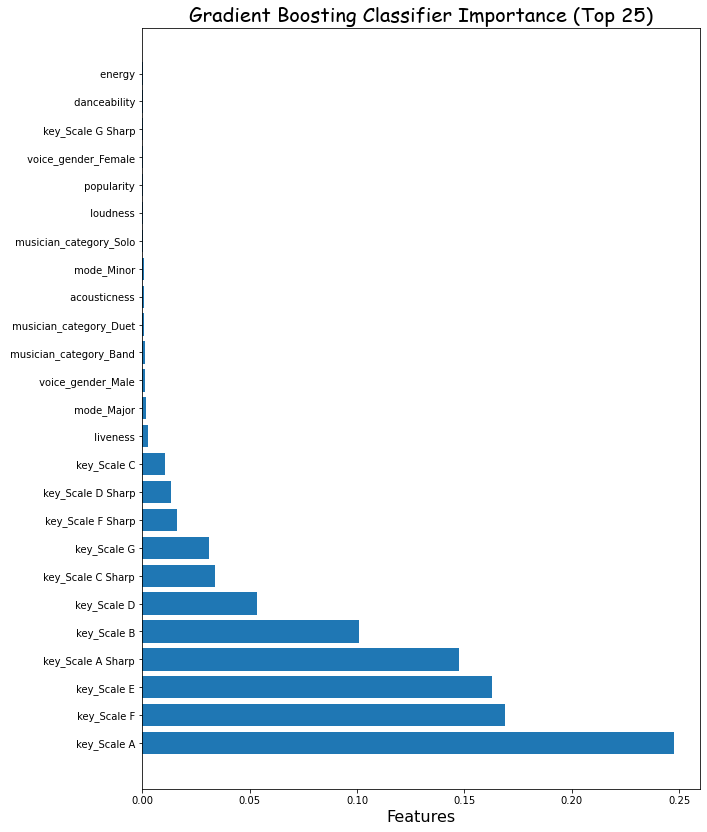

In [152]:
feature_names_25 = [i[0] for i in feature_importances_ranked[:25]]
y_ticks = np.arange(0, len(feature_names_25))
x_axis = [i[1] for i in feature_importances_ranked[:25]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_25, x_axis)   #horizontal barplot
plt.title('Gradient Boosting Classifier Importance (Top 25)',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()

In [156]:
model_performance = {
    
    'Model Name'        : ['Logistic Regression',
                           'Classification Trees', 
                           'Random Forest',
                           'Gradient Boosted Models'],
           
    'AUC Score'         : [roc_auc_score_log, 
                           roc_auc_score_dtc, 
                           roc_auc_score_rf_best,
                           roc_auc_score_gb
                            ],
    'F1 Score'          :   [f1_score_log,
                            f1_score_dtc,
                            f1_score_best_rf,
                            f1_score_gb
                            ]
}

In [157]:
model_performance = pd.DataFrame(model_performance)


In [160]:
model_performance


,Model Name,AUC Score,F1 Score
0,Logistic Regression,0.930286,0.731990
1,Classification Trees,0.902081,0.722709
2,Random Forest,0.941404,0.770886
3,Gradient Boosted Models,0.998958,0.967290
